In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats as stm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import multicomp as mc 

In [25]:
# Load the dataset
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

In [26]:
# 1. Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.
temp_ann_mean = df['temp_ann'].mean()
temp_ann_std = df['temp_ann'].std()
temp_ann_zscore = (df['temp_ann'] - temp_ann_mean) / temp_ann_std

In [27]:
# Calculate new mean and standard deviation
new_mean = temp_ann_zscore.mean()
new_sd = temp_ann_zscore.std()

In [28]:
# Calculate 95% confidence interval
n = len(temp_ann_zscore)
margin_of_error = 1.96 * (new_sd / np.sqrt(n))  # 1.96 is the z-score for 95% confidence interval
ci_lower = new_mean - margin_of_error
ci_upper = new_mean + margin_of_error

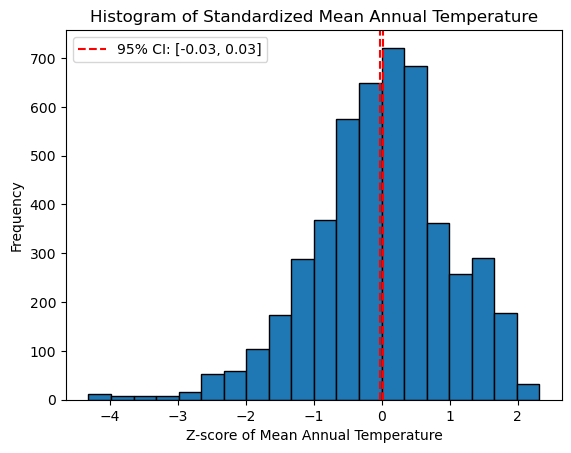

In [29]:
# Plot histogram
plt.hist(temp_ann_zscore, bins=20, edgecolor='black')
plt.xlabel('Z-score of Mean Annual Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Mean Annual Temperature')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
plt.axvline(ci_upper, color='red', linestyle='--')
plt.legend()
plt.show()

In [30]:
# 2. Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test using both standardized and non-standardized values. Please state which is/are the null hypothesis of your test(s).
presence_temp = df.loc[df['Salmo trutta fario'] == 1, 'temp_ann'].dropna()
absence_temp = df.loc[df['Salmo trutta fario'] == 0, 'temp_ann'].dropna()

In [31]:
# t-test
t_stat, t_p_value = stats.ttest_ind(presence_temp, absence_temp)
print(f"t-statistic: {t_stat}, p-value: {t_p_value}")

t-statistic: -43.45438419732505, p-value: 0.0


In [32]:
# Mann-Whitney U Test
mwu_stat, mwu_p_value = stats.mannwhitneyu(presence_temp, absence_temp)
print(f"Mann-Whitney U statistic: {mwu_stat}, p-value: {mwu_p_value}")

Mann-Whitney U statistic: 1027812.5, p-value: 7.105075261935899e-303


In [33]:
# 3. Test whether there are differences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these differences significant? Please state which is/are the null hypothesis of your test(s).
# H0: There are no differences in the mean elevation among the eight most sampled catchments.

# Filter the eight most sampled catchments
top_8_catchments = df['Catchment_name'].value_counts().nlargest(8).index
df_top_8 = df[df['Catchment_name'].isin(top_8_catchments)]

In [34]:
# Perform ANOVA test
model = sm.formula.ols('Elevation_mean_catch ~ C(Catchment_name)', data=df_top_8).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                         sum_sq      df           F         PR(>F)
C(Catchment_name)  2.137395e+08     7.0  227.953983  1.369526e-285
Residual           5.315097e+08  3968.0         NaN            NaN


In [35]:
# Post hoc test (Tukey HSD)
tukey_result = mc.MultiComparison(df_top_8['Elevation_mean_catch'], df_top_8['Catchment_name']).tukeyhsd()
print("Tukey HSD:")
print(tukey_result)

Tukey HSD:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1       group2    meandiff p-adj lower upper reject
-----------------------------------------------------------
  Cantabrica       Catala      nan   nan   nan   nan  False
  Cantabrica        Douro      nan   nan   nan   nan  False
  Cantabrica         Ebro      nan   nan   nan   nan  False
  Cantabrica Galiza-Norte      nan   nan   nan   nan  False
  Cantabrica       Guadia      nan   nan   nan   nan  False
  Cantabrica        Minho      nan   nan   nan   nan  False
  Cantabrica         Tejo      nan   nan   nan   nan  False
      Catala        Douro      nan   nan   nan   nan  False
      Catala         Ebro      nan   nan   nan   nan  False
      Catala Galiza-Norte      nan   nan   nan   nan  False
      Catala       Guadia      nan   nan   nan   nan  False
      Catala        Minho      nan   nan   nan   nan  False
      Catala         Tejo      nan   nan   nan   nan  False
       Douro         Ebro    